## Trabalho de Conclusão de Curso - Pós-graduação em bioinformática aplicada a genômica médica

Proposta: Criar uma pipeline capaz de concatenar os dados gerados do painel de genes do sequenciamento Ion Torrent PGM, aplicando os filtros cabíveis e gerando como output um report sobre os genes alterados, tipos de muatações frequentes.

1º Passo: Preparar o ambiente baixando as bibliotecas.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

2º Passo: Importar as amostras do drive ou adicioná-las manuamente.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3º Passo: Copiar o caminho da pasta no drive (localizada nos três pontos ao lado do nome da pasta) para que possamos observar os arquivos que estão dentro da pasta.

In [ ]:
!ls "/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe"


1022.xlsx  1192.xlsx  1242.xlsx  1302.xlsx  1352.xlsx  1402.xlsx
1052.xlsx  1201.xlsx  1251.xlsx  1312.xlsx  1362.xlsx  1412.xlsx
1162.xlsx  1212.xlsx  1262.xlsx  1322.xlsx  1372.xlsx  892.xlsx
1172.xlsx  1222.xlsx  1282.xlsx  1332.xlsx  1382.xlsx  952.xlsx
1182.xlsx  1232.xlsx  1292.xlsx  1342.xlsx  1392.xlsx  982.xlsx


4º Passo: Englobar os arquivos com o final 'xlsx' que estão na pasta Pipe, em somente um arquivo. 

In [ ]:
import glob
glob.glob("/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/*.xlsx")

['/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/952.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/1022.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/1052.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/1162.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/1182.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/1201.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/982.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/1172.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/1192.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/1212.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/1232.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/1242.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/1251.xlsx',
 '/content/drive/MyDrive/Trabalho_de_Con

In [ ]:
all_data = pd.DataFrame()
for f in glob.glob("/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/*.xlsx"):
    df = pd.read_excel(f, index_col=None, header=0)
    all_data = all_data.append(df,ignore_index=True)

In [ ]:
all_data.head()

##reference=hg19 Unnamed: 1  ...  Unnamed: 37              Unnamed: 38
0  ##referenceURI=hg19        NaN  ...          NaN                      NaN
1              # locus       type  ...       phylop  MyVariantDefaultDb_hg19
2        chr1:43212430        SNV  ...  -0.79,-0.15                      NaN
3        chr1:43212873        SNV  ...        -0.24                      NaN
4        chr1:43212926        SNV  ...        -0.23                      NaN

[5 rows x 39 columns]

5º Passo: Limpar os cabeçalhos para não comprometer o processo de leitura.

In [ ]:
new_header = all_data.iloc[0] 
all_data = all_data[2:] 
all_data.columns = new_header


In [ ]:
all_data.head()

1        # locus type ref  ...     pfam phylop MyVariantDefaultDb_hg19
3  chr1:43212873  SNV   C  ...  PF03171  -0.24                     NaN
4  chr1:43212926  SNV   G  ...  PF03171  -0.23                     NaN
5  chr1:43213285  SNV   C  ...  PF03171  -0.43                     NaN
6  chr1:43213499  SNV   C  ...  PF03171  -0.83                     NaN
7  chr1:43218013  SNV   G  ...  PF03171   5.65                     NaN

[5 rows x 39 columns]

6º Passo: Transformando o arquivo em CSV. E removendo os cabeçalhos com o comando, menos o primeiro e salvando em um novo arquivo.

In [ ]:
all_data.to_csv('all_data.csv')

In [ ]:
!grep -v "\#" all_data.csv > all_new.csv
!head all_new.csv

3,chr1:43212873,SNV,C,1,C/A,PASS,0.000142462315881501,80,"C=40,A=40","C=0.5,A=0.5",50.00,0.008,P3H1,NM_001243246.1,P3H1:exonic:NM_001243246.1,missense,TCC,14,p.Ala709Ser,c.2125G>T,0.03,0.0,99.0,A,AMAF=0.0281:GMAF=0.0096:EMAF=1.0E-4,,,,,rs115690038,,"(dui:D009140;dis:Musculoskeletal Diseases;g:P3H1)(dui:D017437;dis:Skin and Connective Tissue Diseases;g:P3H1)(dui:D001847;dis:Bone Diseases;g:P3H1)(dui:D009358;dis:Congenital, Hereditary, and Neonatal Diseases and Abnormalities;g:P3H1)(dui:D003240;dis:Connective Tissue Diseases;g:P3H1)(dui:D030342;dis:Genetic Diseases, Inborn;g:P3H1)(dui:D001848;dis:Bone Diseases, Developmental;g:P3H1)(dui:D003095;dis:Collagen Diseases;g:P3H1)(dui:D010009;dis:Osteochondrodysplasias;g:P3H1)(dui:D010013;dis:Osteogenesis Imperfecta;g:P3H1)",Vitamin C:Succinic acid:L-Proline,AF_OTH=0.0:AF_Adj=2.39E-3:AF_AFR=2.629E-2:AF_EAS=0.0:AF_FIN=0.0:AF_SAS=0.0:AF_NFE=4.499E-5:AF_AMR=1.21E-3,GO:0050708:GO:0008285:GO:0061077:GO:0005783:GO:1901874:GO:0006457:GO:0003674:GO:000

In [ ]:
!head -n 1 all_data.csv > head.txt
!cat head.txt all_new.csv > all_new_head.csv

In [ ]:
 all_new_head =  pd.read_csv("all_new_head.csv")

7º Passo: Limpar todas as pipes na posição function da tabela, pois dificultará o processo de leitura.

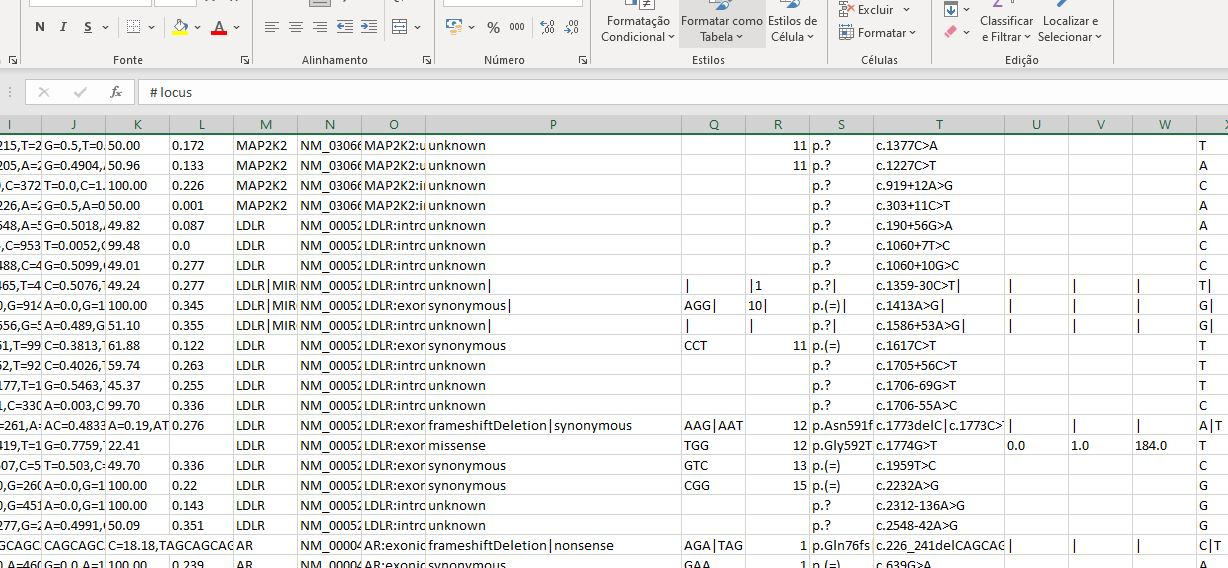

In [ ]:
all_cleaned = all_new_head.replace(to_replace=r'(\|.*)', value='', regex=True)

In [ ]:
all_cleaned.head()

Unnamed: 0        # locus type  ...     pfam  phylop MyVariantDefaultDb_hg19
0           3  chr1:43212873  SNV  ...  PF03171   -0.24                     NaN
1           4  chr1:43212926  SNV  ...  PF03171   -0.23                     NaN
2           5  chr1:43213285  SNV  ...  PF03171   -0.43                     NaN
3           6  chr1:43213499  SNV  ...  PF03171   -0.83                     NaN
4           7  chr1:43218013  SNV  ...  PF03171    5.65                     NaN

[5 rows x 40 columns]

8º Passo: Verificar se há espaços em branco e preenche-los com 0.

In [ ]:
em_branco = np.nan

serie = all_cleaned

In [ ]:
serie.isnull()

Unnamed: 0  # locus   type  ...   pfam  phylop  MyVariantDefaultDb_hg19
0           False    False  False  ...  False   False                     True
1           False    False  False  ...  False   False                     True
2           False    False  False  ...  False   False                     True
3           False    False  False  ...  False   False                     True
4           False    False  False  ...  False   False                     True
...           ...      ...    ...  ...    ...     ...                      ...
10600       False    False  False  ...  False   False                     True
10601       False    False  False  ...  False   False                     True
10602       False    False  False  ...  False   False                     True
10603       False    False  False  ...  False   False                     True
10604       False    False  False  ...  False   False                     True

[10605 rows x 40 columns]

In [ ]:
all_cleaned = all_cleaned.fillna(0)
all_cleaned

Unnamed: 0         # locus  ...       phylop MyVariantDefaultDb_hg19
0               3   chr1:43212873  ...        -0.24                     0.0
1               4   chr1:43212926  ...        -0.23                     0.0
2               5   chr1:43213285  ...        -0.43                     0.0
3               6   chr1:43213499  ...        -0.83                     0.0
4               7   chr1:43218013  ...         5.65                     0.0
...           ...             ...  ...          ...                     ...
10600       10661  chr19:11241915  ...        -0.84                     0.0
10601       10662  chr19:11242044  ...        -0.85                     0.0
10602       10663   chrX:66766347  ...  -0.27,-0.03                     0.0
10603       10664   chrX:66941597  ...         -0.4                     0.0
10604       10665  chrX:153296193  ...         1.79                     0.0

[10605 rows x 40 columns]

9º Passo: Verificar alguns parâmetros do DataFrame

In [ ]:
all_cleaned["gene"].value_counts()

DNAH5      1231
COL1A1      654
CLCN7       596
CYP21A2     463
COL1A2      424
           ... 
GJB6          2
TIMM8B        2
HPDL          2
P3H4          1
WNT1          1
Name: gene, Length: 70, dtype: int64

In [ ]:
all_cleaned["function"].value_counts()

unknown                   7515
synonymous                1825
missense                  1182
frameshiftDeletion          45
nonframeshiftDeletion       19
0                            8
frameshiftInsertion          7
nonframeshiftInsertion       2
nonsense                     2
Name: function, dtype: int64

10º Passo: Aplicar os filtros de cobertura e mutações.


In [ ]:
all_filtered =  all_cleaned[( all_cleaned["coverage"] >= 200) & (( all_cleaned["function"] == "missense") | (all_cleaned["function"] == "nonsense") | ( all_cleaned["function"] == "nonframeshiftDeletion") | ( all_cleaned["function"] == "frameshiftDeletion") | ( all_cleaned["function"] == "frameshiftInsertion") | ( all_cleaned["function"] == "nonframeshiftDeletion"))]

In [ ]:
all_filtered.to_csv('all_filtered.csv')

11º Passo: Verificar alguns dados do novo Data Frame filtrado, como o número de genes mutados e mutações.

In [ ]:
all_filtered["gene"].value_counts()

DNAH5       159
CYP21A2      86
BRCA1        71
BRCA2        57
PMS2         53
DPYD         48
SERPINA1     48
PROP1        40
COL1A1       33
CFTR         31
FBN1         29
P3H1         29
COL1A2       27
TP53         26
SERPINF1     25
APC          24
IFITM5       22
BMPR1A       20
RET          18
EPCAM        17
LDLR         16
DNAI1        15
MSH6         15
MUTYH        14
MLH1         13
GHRHR        12
CLCN7        11
HFE          10
FGFR2         9
FGFR1         9
GH1           7
EGFR          4
IDH1          3
TMEM38B       3
KIT           3
FKBP10        3
GJB2          3
FGFR3         2
SOX9          2
GJB6          2
SOS1          2
AR            2
PTPN11        2
SDHD          1
RAF1          1
MAP2K2        1
MSI1          1
Name: gene, dtype: int64

In [ ]:
all_filtered["function"].value_counts()

missense                 1002
frameshiftDeletion         13
nonframeshiftDeletion      12
frameshiftInsertion         1
nonsense                    1
Name: function, dtype: int64

In [ ]:
all_filtered[["function", "gene"]].groupby("gene").describe()

function                                
            count unique                 top freq
gene                                             
APC            24      1            missense   24
AR              2      1            missense    2
BMPR1A         20      1            missense   20
BRCA1          71      1            missense   71
BRCA2          57      2            missense   56
CFTR           31      1            missense   31
CLCN7          11      1            missense   11
COL1A1         33      1            missense   33
COL1A2         27      1            missense   27
CYP21A2        86      3            missense   71
DNAH5         159      1            missense  159
DNAI1          15      1            missense   15
DPYD           48      1            missense   48
EGFR            4      1            missense    4
EPCAM          17      1            missense   17
FBN1           29      1            missense   29
FGFR1           9      2  frameshiftDeletion    5
FGFR2           9      1            missense    9
FGFR3           2      1            missense    2
FKBP10          3      1            missense    3
GH1             7      1            missense    7
GHRHR          12      1            missense   12
GJB2            3      2            missense    2
GJB6            2      1            missense    2
HFE            10      1            missense   10
IDH1            3      1            missense    3
IFITM5         22      1            missense   22
KIT             3      1            missense    3
LDLR           16      2            missense   15
MAP2K2          1      1            missense    1
MLH1           13      1            missense   13
MSH6           15      2            missense   14
MSI1            1      1            missense    1
MUTYH          14      1            missense   14
P3H1           29      1            missense   29
PMS2           53      2            missense   52
PROP1          40      1            missense   40
PTPN11          2      1            missense    2
RAF1            1      1            missense    1
RET            18      1            missense   18
SDHD            1      1            missense    1
SERPINA1       48      1            missense   48
SERPINF1       25      1            missense   25
SOS1            2      1            missense    2
SOX9            2      1  frameshiftDeletion    2
TMEM38B         3      1            missense    3
TP53           26      1            missense   26

12º Passo: Agora vamos observar esses dados gerados de forma gráfica.

In [ ]:
%matplotlib inline

In [ ]:
#COMANDO COM PARÂMETROS DE FONTE PARA O GRÁFICO

plt.rcParams.update({'font.size':50})

In [ ]:
#GERANDO O GRÁFICO DE PIZZA

genes = ['DNAH5', 'CYP21A2', 'BRCA1', 'BRCA2', 'PMS2', 'DPYD', 'SERPINA1', 'PROP1', 'COL1A1', 'CFTR', 'FBN1', 'P3H1', 'COL1A2', 'TP53', 'SERPINF1', 'APC', 'IFITM5', 'BMPR1A', 'RET', 'EPCAM', 'LDLR', 'DNAI1', 'MSH6', 'MUTYH', 'MLH1', 'GHRHR', 'CLCN7', 'HFE', 'FGFR1', 'FGFR2', 'GH1', 'EGFR', 'IDH1', 'GJB2', 'TMEM38B', 'FKBP10', 'KIT', 'AR', 'SOS1', 'GJB6', 'SOX9', 'PTPN11', 'FGFR3', 'MSI1', 'MAP2K2', 'SDHD', 'RAF1']
valores = [159, 86, 71, 57, 53, 48, 48, 40, 33, 31, 29, 29, 27, 26, 25, 24, 22, 20, 18, 17, 16, 15, 15, 14, 13, 12, 11, 10, 9, 9, 7, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05) 

plt.figure(figsize=(200,150))
plt.pie(x=valores, labels=genes, startangle=180,explode=explode)

plt.show()

Text(0.5, 1.0, 'genes por mutações')

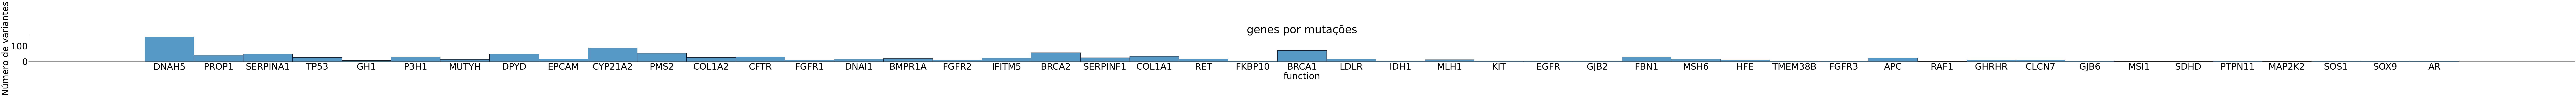

In [ ]:
#GERANDO GRÁFICO DE BARRAS

sns.displot(all_filtered["gene"], aspect=40, bins=50)
plt.ylabel("Número de variantes")
plt.xlabel("function")
plt.title("genes por mutações")

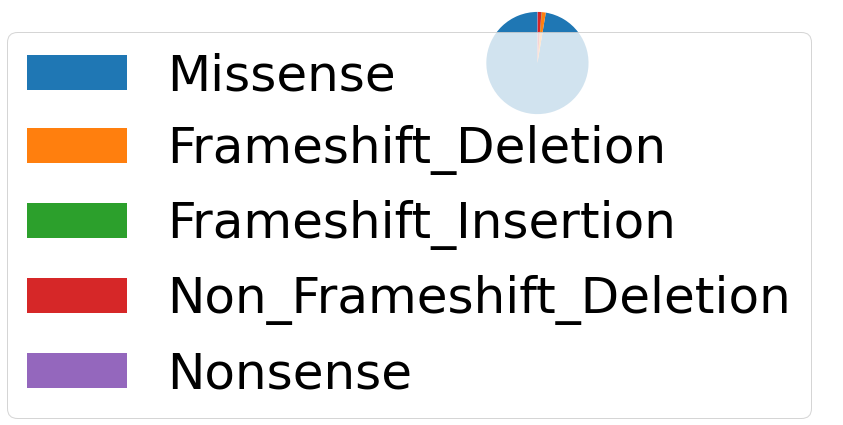

In [ ]:
#GERANDO GRÁFICO DE PIZZA COM PIE CHART

plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

labels = ['Missense', 'Frameshift_Deletion', 'Frameshift_Insertion','Non_Frameshift_Deletion', 'Nonsense']
sizes = [1002, 13, 1, 12, 1]

patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')

plt.show()

### Removendo as variantes repetidas

1º Passo: Ler o arquivo gerado pelos passos anteiores.

In [ ]:
all_filtered.head()

Unnamed: 0         # locus  ... phylop MyVariantDefaultDb_hg19
75           78   chr5:13719089  ...   1.69                     0.0
126         129  chr5:177422876  ...  -0.49                     0.0
267         270  chr14:94847415  ...  -0.45                     0.0
268         271  chr14:94849201  ...  -0.76                     0.0
302         305   chr17:7579472  ...   1.02                     0.0

[5 rows x 40 columns]

In [ ]:
#VERIFICANDO O COMPRIMENTO DA TABELA COM AS VARIANTES REPETIDAS

length=  len(all_filtered)
length

1029

2º Passo: Retirando as variantes que se repetem.

In [ ]:
new = all_filtered.drop_duplicates(subset=['protein'])
new

Unnamed: 0         # locus  ... phylop MyVariantDefaultDb_hg19
75             78   chr5:13719089  ...   1.69                     0.0
126           129  chr5:177422876  ...  -0.49                     0.0
267           270  chr14:94847415  ...  -0.45                     0.0
268           271  chr14:94849201  ...  -0.76                     0.0
302           305   chr17:7579472  ...   1.02                     0.0
...           ...             ...  ...    ...                     ...
10169       10228  chr13:32910630  ...   1.02                     0.0
10317       10378   chr2:39239469  ...   7.67                     0.0
10346       10407   chr5:13700881  ...   6.03                     0.0
10503       10564  chr13:20763341  ...   0.63                     0.0
10524       10585  chr15:48773963  ...   7.73                     0.0

[205 rows x 40 columns]

In [ ]:
#VERIFICANDO O TAMANHO DO NOVO ARQUIVO GERADO

length_2 =  len(new)
length_2

205

In [ ]:
new.to_csv('new.csv')

3º Passo: Verificando os novos parâmetros.

In [ ]:
new["gene"].value_counts()

DNAH5       28
CYP21A2     18
BRCA2       14
BRCA1       13
P3H1        10
PMS2        10
DPYD         8
CFTR         8
FBN1         6
SERPINA1     5
LDLR         5
MSH6         5
COL1A1       4
RET          4
APC          4
MUTYH        4
HFE          4
DNAI1        3
GJB2         3
MLH1         3
PROP1        3
FKBP10       3
SERPINF1     3
GHRHR        3
AR           2
GH1          2
SOS1         2
GJB6         2
FGFR2        2
FGFR3        2
FGFR1        2
SOX9         2
CLCN7        2
COL1A2       2
KIT          2
EPCAM        1
TMEM38B      1
RAF1         1
BMPR1A       1
MSI1         1
PTPN11       1
SDHD         1
IDH1         1
EGFR         1
MAP2K2       1
IFITM5       1
TP53         1
Name: gene, dtype: int64

In [ ]:
new["function"].value_counts()

missense                 194
frameshiftDeletion         8
frameshiftInsertion        1
nonsense                   1
nonframeshiftDeletion      1
Name: function, dtype: int64

In [ ]:
new[["function", "gene"]].groupby("gene").describe()

function                                
            count unique                 top freq
gene                                             
APC             4      1            missense    4
AR              2      1            missense    2
BMPR1A          1      1            missense    1
BRCA1          13      1            missense   13
BRCA2          14      2            missense   13
CFTR            8      1            missense    8
CLCN7           2      1            missense    2
COL1A1          4      1            missense    4
COL1A2          2      1            missense    2
CYP21A2        18      3            missense   15
DNAH5          28      1            missense   28
DNAI1           3      1            missense    3
DPYD            8      1            missense    8
EGFR            1      1            missense    1
EPCAM           1      1            missense    1
FBN1            6      1            missense    6
FGFR1           2      2  frameshiftDeletion    1
FGFR2           2      1            missense    2
FGFR3           2      1            missense    2
FKBP10          3      1            missense    3
GH1             2      1            missense    2
GHRHR           3      1            missense    3
GJB2            3      2            missense    2
GJB6            2      1            missense    2
HFE             4      1            missense    4
IDH1            1      1            missense    1
IFITM5          1      1            missense    1
KIT             2      1            missense    2
LDLR            5      2            missense    4
MAP2K2          1      1            missense    1
MLH1            3      1            missense    3
MSH6            5      2            missense    4
MSI1            1      1            missense    1
MUTYH           4      1            missense    4
P3H1           10      1            missense   10
PMS2           10      2            missense    9
PROP1           3      1            missense    3
PTPN11          1      1            missense    1
RAF1            1      1            missense    1
RET             4      1            missense    4
SDHD            1      1            missense    1
SERPINA1        5      1            missense    5
SERPINF1        3      1            missense    3
SOS1            2      1            missense    2
SOX9            2      1  frameshiftDeletion    2
TMEM38B         1      1            missense    1
TP53            1      1            missense    1

4º Passo: Gerando os novos gráficos

In [ ]:
plt.rcParams.update({'font.size':50})

In [ ]:
genes = ['DNAH5', 'CYP21A2', 'BRCA2', 'BRCA1', 'PMS2', 'P3H1',  'DPYD', 'CFTR', 'FBN1', 'SERPINA1', 'MSH6', 'LDLR', 'COL1A1', 'RET', 'HFE', 'APC', 'MUTYH', 'SERPINF1', 'FKBP10', 'GJB2', 'GHRHR', 'MLH1', 'PROP1', 'DNAI1', 'KIT', 'FGFR3', 'SOX9', 'FGFR2', 'CLCN7', 'SOS1', 'COL1A2', 'FGFR1', 'GJB6', 'AR', 'GH1', 'BMPR1A', 'PTPN11', 'SDHD', 'EPCAM', 'IFITM5', 'MAP2K2', 'TMEM38B', 'EGFR', 'IDH1', 'MSI1', 'RAF1', 'TP53']
valores = [28, 18, 14, 13, 10, 10, 8, 8, 6, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

plt.figure(figsize=(150,100))
plt.pie(x=valores, labels=genes, startangle=180)

plt.show()

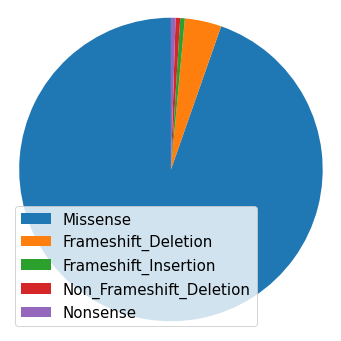

In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

labels = ['Missense', 'Frameshift_Deletion', 'Frameshift_Insertion','Non_Frameshift_Deletion', 'Nonsense']
sizes = [194, 8, 1, 1, 1]

patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')

plt.show()


### Genes relacionados ao fenótipo - Painel

In [ ]:
plt.rcParams.update({'font.size':15})

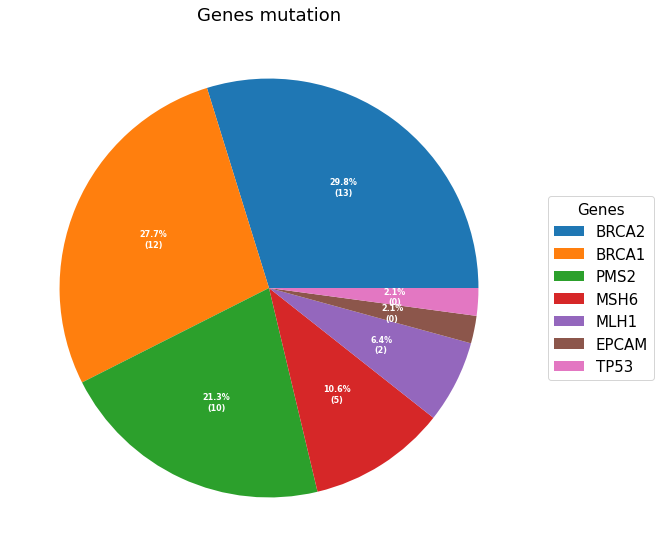

In [ ]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw=dict(aspect="equal"))

rotulos = ['BRCA2', 'BRCA1', 'PMS2', 'MSH6', 'MLH1', 'EPCAM', 'TP53']
data = [14, 13, 10, 5, 3, 1, 1]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}%\n({:d})'.format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color='w'))

ax.legend(wedges, rotulos,
         title="Genes",
         loc="right",
         bbox_to_anchor=(0.75, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="black")

ax.set_title("Genes mutation")

plt.show()